In [ ]:
!pip install matplotlib seaborn plotly
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/dataseter.csv') # Load the dataset into the 'data' variable

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size (number of rows and columns):")
print(data.shape)

Dataset size (number of rows and columns):
(3000, 16)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   object
 3   YELLOW_FINGERS         3000 non-null   object
 4   ANXIETY                3000 non-null   object
 5   PEER_PRESSURE          3000 non-null   object
 6   CHRONIC_DISEASE        3000 non-null   object
 7   FATIGUE                3000 non-null   object
 8   ALLERGY                3000 non-null   object
 9   WHEEZING               3000 non-null   object
 10  ALCOHOL_CONSUMING      3000 non-null   object
 11  COUGHING               3000 non-null   object
 12  SHORTNESS_OF_BREATH    3000 non-null   object
 13  SWALLOWING_DIFFICULTY  3000 non-null   object
 14  CHEST_PAIN             3000 non-null   object
 15  LUNG_CANCER          

In [ ]:
# Display descriptive statistics for the dataset
print("\nDescriptive statistics for the dataset:")
print(data.describe())


Descriptive statistics for the dataset:
               AGE
count  3000.000000
mean     55.169000
std      14.723746
min      30.000000
25%      42.000000
50%      55.000000
75%      68.000000
max      80.000000


In [ ]:
# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


In [ ]:
#  Display the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
  GENDER  AGE SMOKING YELLOW_FINGERS ANXIETY PEER_PRESSURE CHRONIC_DISEASE  \
0      M   65     Yes            Yes     Yes            No              No   
1      F   55     Yes             No      No           Yes             Yes   
2      F   78      No             No     Yes           Yes             Yes   
3      M   60      No            Yes     Yes           Yes              No   
4      F   80     Yes            Yes      No           Yes             Yes   

  FATIGUE ALLERGY WHEEZING ALCOHOL_CONSUMING COUGHING SHORTNESS_OF_BREATH  \
0     Yes      No       No                No       No                  No   
1      No      No       No               Yes      Yes                 Yes   
2      No     Yes       No               Yes      Yes                  No   
3     Yes      No      Yes               Yes       No                 Yes   
4      No     Yes       No               Yes      Yes                 Yes   

  SWALLOWING_DIFFICULTY CHEST_PAIN LUN

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

# Define features (X) and target (y)
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.5283333333333333,
 '              precision    recall  f1-score   support\n\n           0       0.54      0.48      0.51       302\n           1       0.52      0.58      0.55       298\n\n    accuracy                           0.53       600\n   macro avg       0.53      0.53      0.53       600\nweighted avg       0.53      0.53      0.53       600\n')

In [ ]:
# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.5283333333333333
Precision: 0.5227963525835866
Recall: 0.5771812080536913
F1 Score: 0.5486443381180224


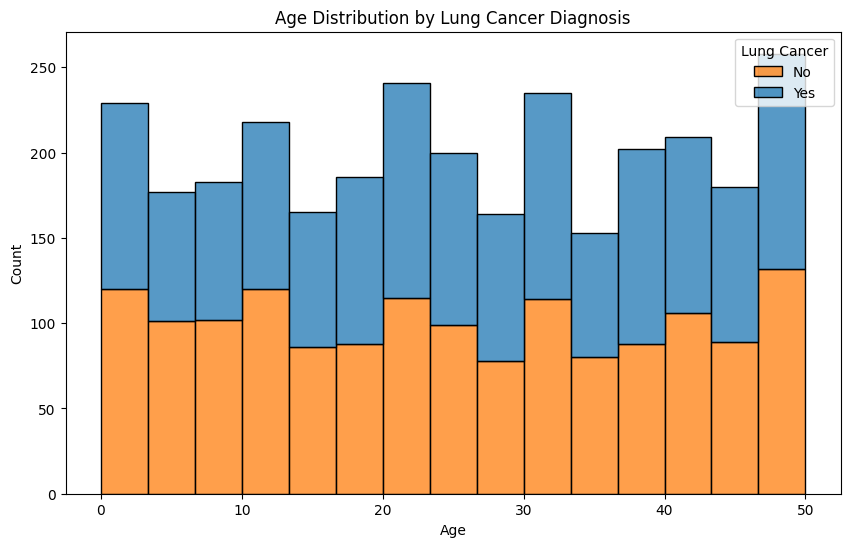

In [ ]:
plt.figure(figsize=(10, 6))
# Pass 'data' to the 'data' parameter
sns.histplot(x='AGE', hue='LUNG_CANCER', multiple='stack', bins=15, data=data)
plt.title('Age Distribution by Lung Cancer Diagnosis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Lung Cancer', labels=['No', 'Yes'])
plt.show()

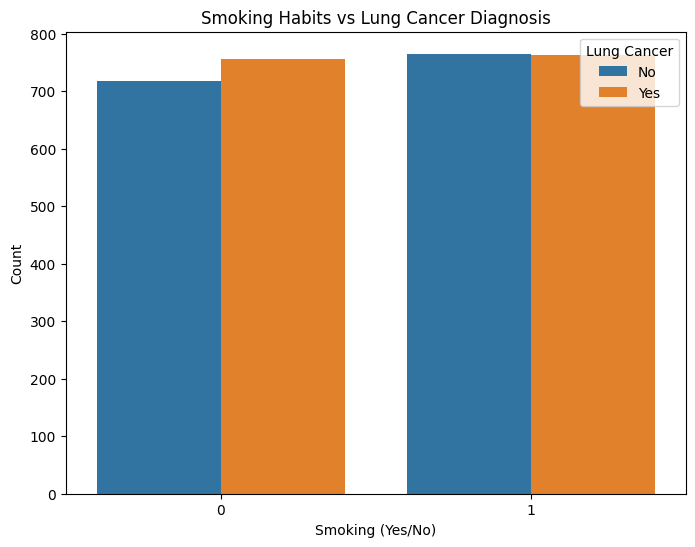

In [ ]:
plt.figure(figsize=(8, 6))
# Assuming 'data' is your DataFrame
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=data) # Pass the DataFrame to the data parameter
plt.title('Smoking Habits vs Lung Cancer Diagnosis')
plt.xlabel('Smoking (Yes/No)')
plt.ylabel('Count')
plt.legend(title='Lung Cancer', labels=['No', 'Yes'])
plt.show()

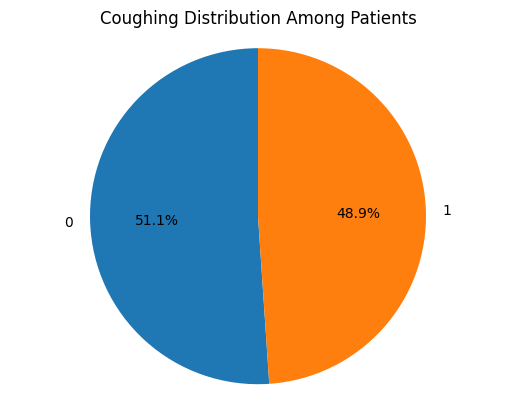

In [ ]:
# Pie chart to show the distribution of patients with coughing
labels = data['COUGHING'].value_counts().index
sizes = data['COUGHING'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Ensures that the pie chart is drawn as a circle
plt.title('Coughing Distribution Among Patients')
plt.show()



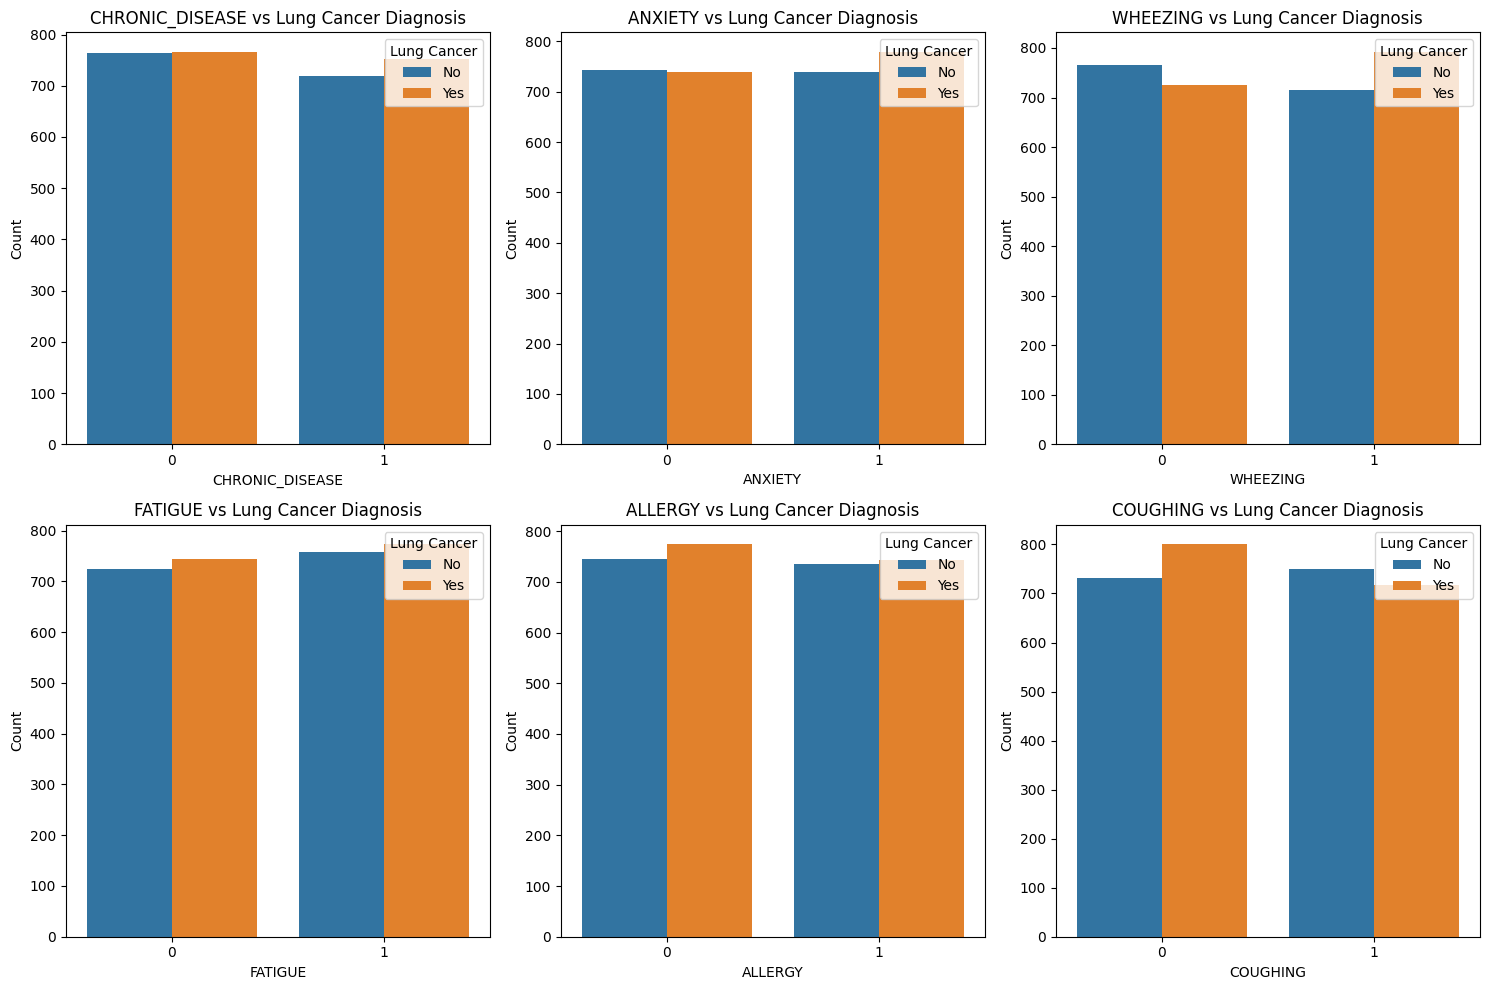

In [ ]:
health_conditions = ['CHRONIC_DISEASE', 'ANXIETY', 'WHEEZING', 'FATIGUE', 'ALLERGY', 'COUGHING']

plt.figure(figsize=(15, 10))
for idx, condition in enumerate(health_conditions):
    plt.subplot(2, 3, idx + 1)
    # Replace 'df' with 'data' to use the correct DataFrame:
    sns.countplot(data=data, x=condition, hue='LUNG_CANCER')
    plt.title(f'{condition} vs Lung Cancer Diagnosis')
    plt.xlabel(condition)
    plt.ylabel('Count')
    plt.legend(title='Lung Cancer', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()